In [37]:
import sys 
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import itertools
from collections import  Counter
sns.set(context='paper', style='whitegrid', color_codes=True, font_scale=1.8)
colorcycle = [(0.498, 0.788, 0.498),
              (0.745, 0.682, 0.831),
              (0.992, 0.753, 0.525),
              (0.220, 0.424, 0.690),
              (0.749, 0.357, 0.090),
              (1.000, 1.000, 0.600),
              (0.941, 0.008, 0.498),
              (0.400, 0.400, 0.400)]
sns.set_palette(colorcycle)
mpl.rcParams['figure.max_open_warning'] = 65
mpl.rcParams['figure.figsize'] = [12, 7]

from speclib import misc, plotting, loaders

%matplotlib inline 

In [3]:
ua = loaders.Useralias() 
userlist = loaders.getUserList() 

# Goal

* Filter data for omnipresent devices, which are a bad proxy for social interactions
* Group data


In [5]:
u0 = userlist[0]

In [6]:
u0

'28b76d7b7879d364321f164df5169f'

In [7]:
df = loaders.loadUserBluetooth(u0, ua)

Filter out time where they're probably at DTU

In [75]:
is_freetime = (df.index.hour > 19) | (df.index.hour < 7)

dff = df[is_freetime]

Group to day of year

In [76]:
doy = dff.groupby(dff.index.dayofyear)['bt_mac'].unique() 

Count occurence of mac addresses, summed for all days (in free time)

647da12097b032f653183feb76067d1a3e2dce0d0f31bbf54a772fbcb465e68a    200
69752cf5dec2a6ad97c5678dfb80b0021ff55afa121b20068e72140f3e7e9afc    121
f51e357a57cd274cff7e5e43f71297eaa5a6777b41924851659143fa5fd6c200     83
559f27d6f66229ef07533bbb8ea502fb7e4cfc5079ffc6e4e9f50d0d4451320b     63
29ec51ae6823202c71133c291e289f193a44275d28687412b08a97cccc6b2781     57
a723692e6d835b8d8fb99d61d28e3e513eaaa2a3c643d62de3171e69e2d9077b     40
9b9accfde6a2b852ca5c368c8d6ef3a8adc6dfcae28d0d4fa43e4776c3450571     37
aa5c145dbfd93e93355df175d1913c92c9f1810e086a93616ceb1b430b5bfd13     35
6a7394988b3f301a1177bfc45ab9a87cdfe3e88fcb7f9c7003ede888d5ccd5f1     35
2170265c5674d7abdb3dd7dc36fffb617cd89410e6188ffdb33c811377e6b821     31
9766dbf05b3a1350a1b28d43762d30525b0b470b2e0930c1eecd4ec0d6febdf5     27
c46c51fb297cc6297fd761e3244e619c6daa6eb18fee7a7d1fb906ee1396abb1     19
dtype: int64

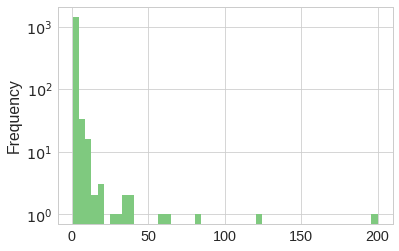

In [111]:
fig, ax = plt.subplots()
ax.set_yscale('log')
cnt = pd.value_counts(el for el in itertools.chain(*doy))
display(cnt.head(12)) 
cnt.plot.hist(50, ax=ax)

In [141]:
discard = set(cnt[cnt > 30].index)
discard

{'2170265c5674d7abdb3dd7dc36fffb617cd89410e6188ffdb33c811377e6b821',
 '29ec51ae6823202c71133c291e289f193a44275d28687412b08a97cccc6b2781',
 '559f27d6f66229ef07533bbb8ea502fb7e4cfc5079ffc6e4e9f50d0d4451320b',
 '647da12097b032f653183feb76067d1a3e2dce0d0f31bbf54a772fbcb465e68a',
 '69752cf5dec2a6ad97c5678dfb80b0021ff55afa121b20068e72140f3e7e9afc',
 '6a7394988b3f301a1177bfc45ab9a87cdfe3e88fcb7f9c7003ede888d5ccd5f1',
 '9b9accfde6a2b852ca5c368c8d6ef3a8adc6dfcae28d0d4fa43e4776c3450571',
 'a723692e6d835b8d8fb99d61d28e3e513eaaa2a3c643d62de3171e69e2d9077b',
 'aa5c145dbfd93e93355df175d1913c92c9f1810e086a93616ceb1b430b5bfd13',
 'f51e357a57cd274cff7e5e43f71297eaa5a6777b41924851659143fa5fd6c200'}

In [146]:
dfc = df[~df.bt_mac.isin(discard)]

In [147]:
dfc.shape

(70221, 7)

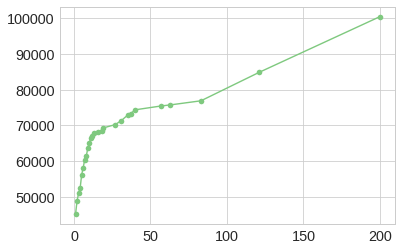

In [226]:
plt.plot(var2[:, 0], var2[:, 1], '-o') 